In [1]:
#Analise de dados de celulares roubados registrados 
#pelo departamento da DEINTER de São José dos Campos 
#de Janeiro de 2018 à Abril de 2019.
#Utilizando as informações cedidas pelo portal de transparencia do governo do estado de São Paulo 
#é possivel evidenciar as regiões com maiores indices de roubo de celulares 
#e assim aplicar uma solução de segurança. 
#Projeto elaborado para a materia de Graduação de Projeto de Banco de Dados Não Estruturados na FATEC de São José dos Campos.

import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
path = 'datasets/'
filenames = {'2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12', '2019_1', '2019_2', '2019_3', '2019_4'}
extension = '.xls'

In [3]:
#Função para percorrer os arquivos de dados e popular o dataframe.
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv((path+file+extension), sep='\t', encoding='UTF-16 LE'))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [4]:
df = populaDataFrame()
df.reset_index()
df.shape
#Quantidade de linhas e colunas no dataframe.

(11638, 54)

In [5]:
df.sample(10)
#10 linhhas aleatórias e seus dados.

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
127,2018,1651,1651/2018,09/09/2018 20:21:47,09/09/2018 21:00:38,09/09/2018,A NOITE,09/09/2018,09/09/2018 20:21:47,Desconhecida,Não,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Residência,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.PLANTÃO PINDA,DEL.POL.PINDAMONHANGABA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - RESIDENCIA,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Asus
599,2018,243,243/2018,26/01/2018 13:32:50,26/01/2018 13:52:03,26/01/2018,PELA MANHÃ,26/01/2018,26/01/2018 13:32:50,Desconhecida,Não,NaN,RUA DOS HELIOTROPIOS,1.0,JARDIM MOTORAMA,S.JOSE DOS CAMPOS,SP,"-23,1732786339999","-45,8212632419999",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,06º D.P. S.JOSE DOS CAMPOS,06º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENH0351,SP,S.JOSE DOS CAMPOS,Prata,VW/CROSSFOX,2009.0,2010.0,AUTOMOVEL,1.0,Apple
913,2018,129,129/2018,20/02/2018 13:17:50,20/02/2018 13:19:26,15/02/2018,A TARDE,20/02/2018,20/02/2018 13:17:50,Conhecida,Sim,253/2018 - 130514,PRAÇA CÔNEGO SIQUEIRA,1.0,ALTO CRUZEIRO,CUNHA,SP,"-23,0804000313499","-44,9613223492",Via pública,IC,BO PARA ADENDO,DEL.POL.CUNHA,DEL.POL.CUNHA,Título IX - Paz pública (arts. 286 a 288),Associação Criminosa (art. 288),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
262,2018,4079,4079/2018,15/12/2018 11:41:24,15/12/2018 13:56:15,13/12/2018,DE MADRUGADA,15/12/2018,15/12/2018 11:41:24,Desconhecida,Não,NaN,RODOVIA PRESIDENTE DUTRA (BR 116),133.0,AREA RURAL,CACAPAVA,SP,"-23,1339389101186","-45,7493453491457",Comércio e serviços,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.POL.CACAPAVA,DEL.POL.CACAPAVA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,"caput. Subtrair coisa móvel alheia, mediante g...",Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,LG
725,2018,1109606,1109606/2018,27/08/2018 07:28:06,27/08/2018 07:28:05,25/08/2018,A NOITE,25/08/2018,27/08/2018 07:28:06,Desconhecida,Não,NaN,AVENIDA ARTHUR COSTA FILHO,400.0,SUMARÉ,CARAGUATATUBA,SP,NaN,NaN,Via Pública,NaN,BO PARA REGISTRO,DELEGACIA ELETRONICA,01º D.P. CARAGUATATUBA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
197,2018,2825,2825/2018,08/11/2018 22:15:34,08/11/2018 22:46:02,08/11/2018,PELA MANHÃ,08/11/2018,08/11/2018 22:15:34,Desconhecida,Não,NaN,RODOVIA PRESIDENTE DUTRA (BR 116),169.0,CHÁCARAS REUNIDAS IGARAPÉS,JACAREI,SP,"-23,307353056","-46,044865409",Comércio e serviços,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.SEC.JACAREI PLANTÃO,02º D.P. JACAREI,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FVW2950,SP,CAMPINAS,Branco,VW/24.280 CRM 6X2,2015.0,2015.0,CAMINHÃO,1.0,Motorola
205,2018,460,460/2018,12/03/2018 12:52:46,12/03/2018 13:40:37,10/03/2018,A NOITE,12/03/2018,12/03/2018 12:52:46,Desconhecida,Não,NaN,AVENIDA JOSÉ DA COSTA PINHEIRO JÚNIOR,5000.0,PEREQUE MIRIM,CARAGUATATUBA,SP,"-23,7162776289999","-45,4407357229999",Via 

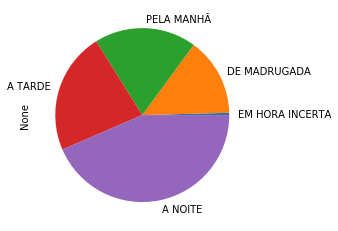

In [6]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='pie')
#Gráfico de pizza com os períodos de ocorrência dos roubos de celulares.

In [7]:
df['PERIDOOCORRENCIA'].value_counts().to_frame()
#Dados quantitativos com os períodos de ocorrência dos roubos de celulares.

,PERIDOOCORRENCIA
A NOITE,5064
A TARDE,2631
PELA MANHÃ,2206
DE MADRUGADA,1688
EM HORA INCERTA,49


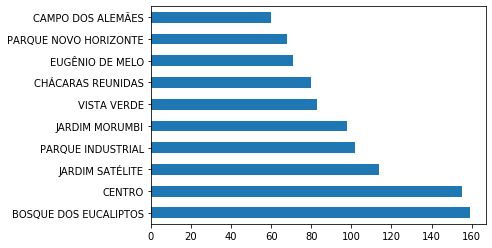

In [8]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().head(10).plot(kind='barh')
#Gráfico de barras horizontais contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

In [9]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().to_frame().head(10)
#Dados quantitativos contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

,BAIRRO
BOSQUE DOS EUCALIPTOS,159
CENTRO,155
JARDIM SATÉLITE,114
PARQUE INDUSTRIAL,102
JARDIM MORUMBI,98
VISTA VERDE,83
CHÁCARAS REUNIDAS,80
EUGÊNIO DE MELO,71
PARQUE NOVO HORIZONTE,68
CAMPO DOS ALEMÃES,60


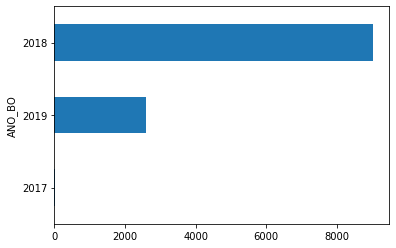

In [10]:
df.groupby('ANO_BO').size().sort_values().plot(kind='barh')
#Gráfico de barras horizontais contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

In [11]:
df['ANO_BO'].value_counts().to_frame()
#Dados quantitativos contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

,ANO_BO
2018,9034
2019,2603
2017,1


In [12]:
df2019_4= pd.DataFrame(pd.read_csv((path+"2019_4"+extension), sep='\t', encoding='UTF-16 LE'))
df2019_4.shape
#Populando o dataframe com o arquivo de dados de 2019-4 e exibindo a quantidade de linhas e colunas.

(623, 54)

In [13]:
geolocalizacoes = df2019_4[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            71
LONGITUDE           71
PERIDOOCORRENCIA     0
dtype: int64

In [14]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [15]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

periodo = geolocalizacoes['PERIDOOCORRENCIA'].values

colors = {
 'DE MADRUGADA': 'blue',
 'PELA MANHÃ': 'green',
 'A TARDE': 'orange',
 'A NOITE': 'red',
 'EM HORA INCERTA': 'purple',
}

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
cont = 0
for la,lo,p in zip(lat,long,periodo):
    folium.Marker(
        location=[float(la.replace(",", ".")), float(lo.replace(",", "."))],
        icon=folium.Icon(color=colors[p])
    ).add_to(mapa)

mapa
#Através da biblioteca do Folium criamos um novo mapa, marcamos os roubos de celulares de abril 2019
#com as latitudes e longitudes do dataframe e definimos a cor do marcador através do período de ocorrência.

In [16]:
geolocalizacoes = df[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            1748
LONGITUDE           1748
PERIDOOCORRENCIA       0
dtype: int64

In [17]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [18]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
 
for la,lo in zip(lat,long):
    coordenadas.append([float(la.replace(",", ".")),float(lo.replace(",", "."))])
    
mapa.add_child(plugins.HeatMap(coordenadas))
#Através da biblioteca do Folium criamos um novo mapa e populamos ele com as latitudes e longitudes do dataframe
#Utilizando um mapa de calor marcamos os pontos de roubos de celulares de janeiro de 2018 à  abril 2019